Created: 2020.07.22

Modified: 2020.07.27

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.callbacks.hooks import *
from fastai.utils.mem import *

import random
import pandas as pd
from pathlib import Path

import sys
sys.path.append('../functions')
import functions32 as f32

# 2D AXIAL

In [3]:
folder_path = Path('/data-10tb/shared/skull/axial-2d/')

df_full = pd.read_csv(folder_path/'bias_mask-test-val-axial-2d.csv')
print(df_full.shape)
#df_full.head()

(425766, 6)


#### Select part of the whole df

In [4]:
df = f32.split_data(df_full, pct_rand_both=0.003, nr_beg_both=None)
df.shape

Original df=425766:	train=983, val=294,	train+val=1277, df*pct_rand_both=1277.3


(1277, 6)

#### Create a DataBunch v.1

In [5]:
codes = np.loadtxt(folder_path/'codes.txt', dtype=str); codes

array(['background', 'brain'], dtype='<U10')

In [6]:
src = SegmentationItemList.from_df(df, folder_path, cols='bias_path')\
                            .split_from_df(col='usage')\
                            .label_from_df(cols='mask_full_path', classes=codes)

In [7]:
size = 128
bs = 124

In [8]:
data = (src.transform(get_transforms(), size=size, tfm_y=True) 
        .databunch(bs=bs)
        .normalize(imagenet_stats))

In [9]:
data.train_ds[0]

(Image (3, 128, 128), ImageSegment (1, 128, 128))

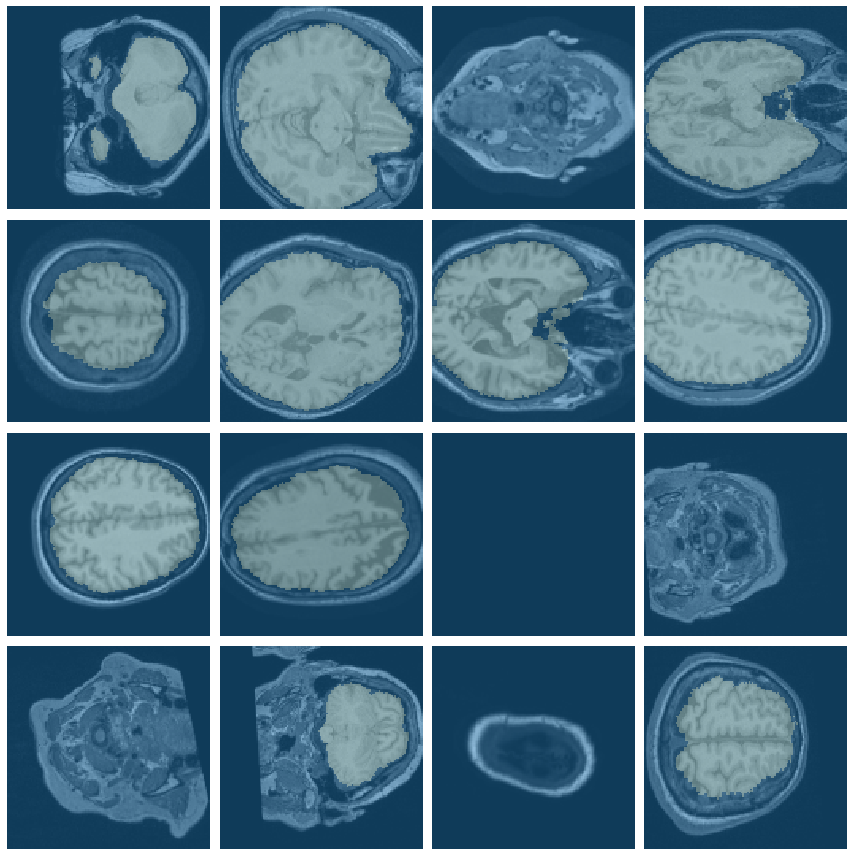

In [10]:
data.show_batch(4, figsize=(12,12))

In [11]:
wd=1e-2

In [15]:
learn = unet_learner(data, models.resnet34, metrics=dice, wd=wd)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.10E-04
Min loss divided by 10: 1.00E-04


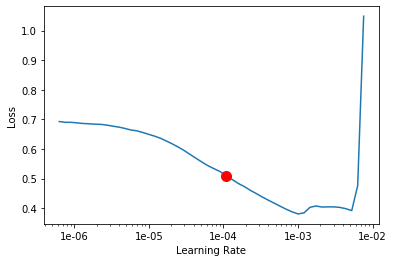

In [16]:
lr_find(learn)
learn.recorder.plot(suggestion=True)

### LR=1e-4

In [17]:
lr=1e-4
learn.fit_one_cycle(10, slice(lr))

epoch,train_loss,valid_loss,dice,time
0,0.629043,0.527820,0.036694,00:06
1,0.476215,0.489257,0.571194,00:06
2,0.359895,0.209461,0.674041,00:06
3,0.283309,0.170546,0.753338,00:07
4,0.233467,0.102011,0.835869,00:06
5,0.198684,0.090426,0.852951,00:06
6,0.174493,0.084239,0.837163,00:06
7,0.155827,0.082944,0.864248,00:06
8,0.140832,0.079673,0.841078,00:06
9,0.129425,0.079090,0.846532,00:06


In [22]:
save = 0
# trening-axial/fit-one-cycle-5/lr=1e-5/freeze/splid-data-pct-rand-both-0.p003-images
sname1 = 'train-ax_foc-10_lr-slice-1e4_fr_sd-pct-rand-both-0p003'
if save:    
    learn.save(sname1)

In [23]:
learn.load(sname1);
learn.fit_one_cycle(10, slice(lr))

epoch,train_loss,valid_loss,dice,time
0,0.075058,0.079619,0.866471,00:06
1,0.076070,0.080446,0.839948,00:06
2,0.072954,0.076474,0.864643,00:06
3,0.070512,0.078094,0.875241,00:06
4,0.069864,0.075496,0.865784,00:07


In [25]:
save = 0
if save:
    sname2 = 'train-ax_foc-15_lr-slice-1e4_fr_sd-pct-rand-both-0p003'
    learn.save(sname2)

In [27]:
learn.load(sname2);

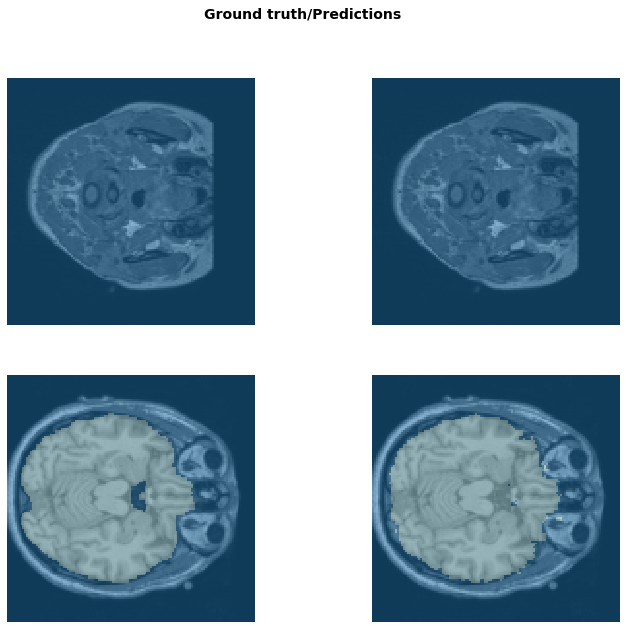

In [28]:
learn.show_results(rows=2, figsize=(12,10))

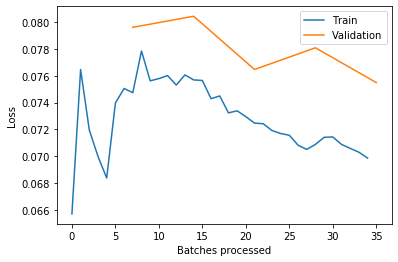

In [29]:
learn.recorder.plot_losses()

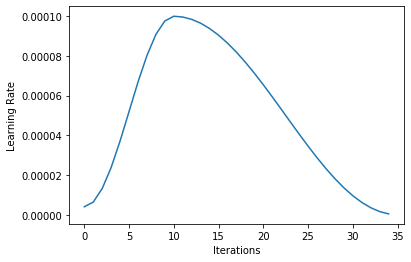

In [30]:
learn.recorder.plot_lr()

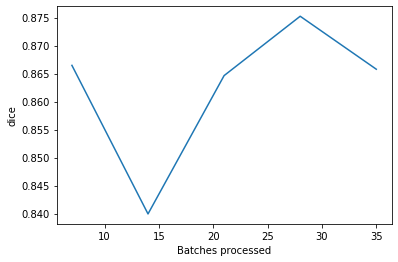

In [31]:
learn.recorder.plot_metrics()

#### Unfreeze

In [32]:
learn.load(sname2);

In [33]:
learn.unfreeze()

In [34]:
lrs = slice(lr/10,lr/4)

In [35]:
learn.fit_one_cycle(10, lrs, pct_start=0.8)

epoch,train_loss,valid_loss,dice,time
0,0.063271,0.077213,0.876427,00:07
1,0.062763,0.076160,0.875227,00:06
2,0.062130,0.079922,0.871500,00:06
3,0.062069,0.075591,0.871212,00:06
4,0.061813,0.074116,0.867462,00:06
5,0.060889,0.073614,0.870827,00:06
6,0.060200,0.073488,0.884415,00:06
7,0.059393,0.072571,0.886015,00:07
8,0.058288,0.075401,0.886056,00:07
9,0.057181,0.075748,0.884311,00:06


In [38]:
save = 0
if save:
    sname3 = 'train-ax_uf_foc-25_lr-slice-1e4_sd-pct-rand-both-0p003'
    learn.save(sname3)

In [39]:
learn.load(sname3);

In [40]:
learn.data.batch_size

124

In [41]:
print(len(learn.data.batch_stats()))
learn.data.batch_stats()

2


[tensor([-1.3075, -1.2074, -0.9798]), tensor([0.8854, 0.9052, 0.9011])]

In [42]:
str(learn.metrics)

'[<function dice at 0x7f89873a3b90>]'

In [43]:
#doc(learn.validate)

In [44]:
learn.validate()

[0.07574769, tensor(0.8843)]

In [45]:
learn.validate(learn.data.valid_dl)

[0.07574769, tensor(0.8843)]

In [46]:
learn.validate(dl=learn.data.train_dl)

[0.049670972, tensor(0.9113)]

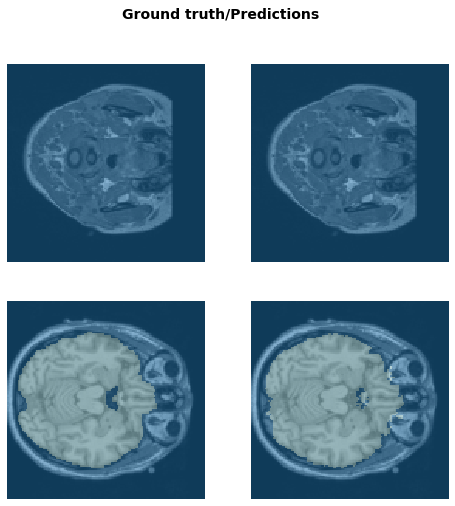

In [47]:
learn.show_results(rows=2)

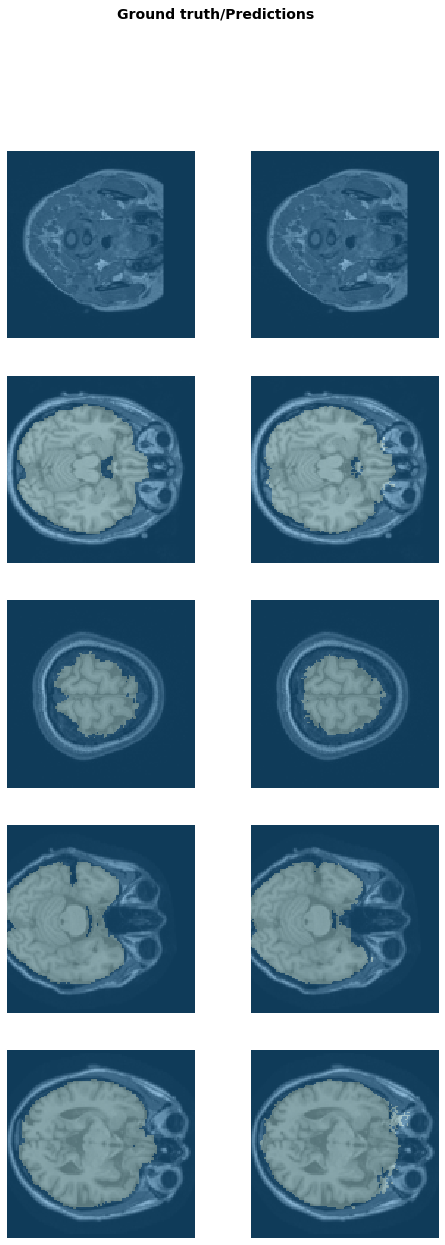

In [48]:
learn.show_results(ds_type=DatasetType.Valid)

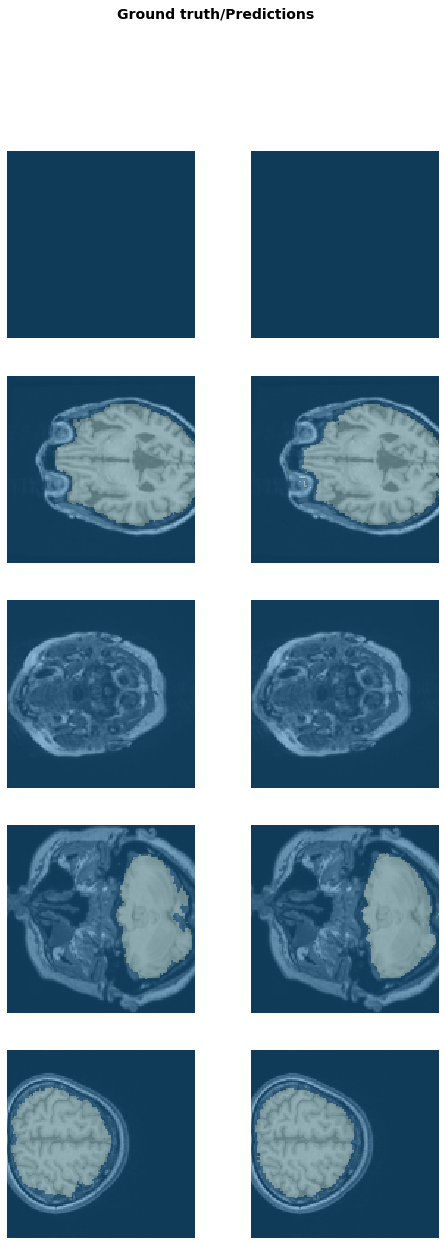

In [49]:
learn.show_results(ds_type=DatasetType.Train,rows=5)

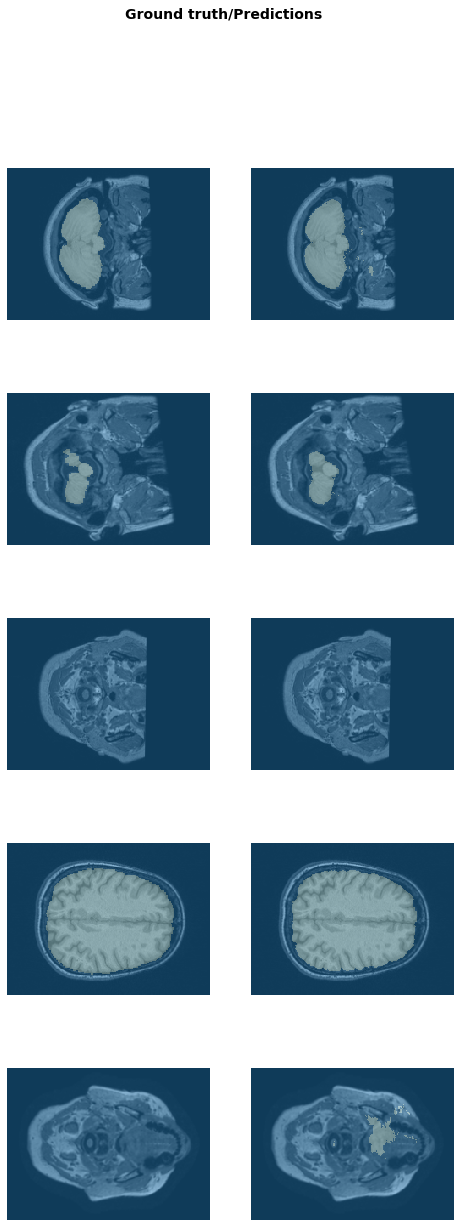

In [276]:
learn.show_results()

In [ ]:
learn.data.batch_size

In [ ]:
print(len(learn.data.batch_stats()))
learn.data.batch_stats()

In [ ]:
str(learn.metrics)

In [ ]:
#doc(learn.validate)

In [ ]:
learn.validate()

In [ ]:
learn.validate(learn.data.valid_dl)

In [ ]:
learn.validate(dl=learn.data.train_dl)